In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
tqdm.pandas()

> 이 코드는 facenet의

# 1. 동양인 데이터
- 같은 사람 3000 pairs, 다른 사람 3000 pairs

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/기업프로젝트-라젠/deepface/tests/pair_with_dist_Asian.csv')
df1

,file_x,file_y,decision,distance,distance_l2
0,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,11.1794,1.3843
1,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,7.3643,0.6335
2,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,8.3086,1.2123
3,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,12.0697,1.2579
4,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,11.8796,1.2326
...,...,...,...,...,...
5995,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,10.3889,1.2115
5996,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,3.4046,0.6786
5997,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,10.9161,1.0488
5998,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,10.8688,1.0539


In [ ]:
import os
os.getcwd()
os.chdir("/content/drive/My Drive/기업프로젝트-라젠/deepface/")

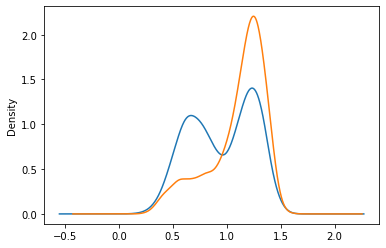

In [ ]:
df1[df1.decision == "Yes"].distance_l2.plot.kde()
df1[df1.decision == "No"].distance_l2.plot.kde()

In [ ]:
df1['distance_l2_scaled'] = -df1['distance_l2']

In [ ]:
df1

,file_x,file_y,decision,distance,distance_l2,distance_l2_scaled
0,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,11.1794,1.3843,-1.3843
1,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,7.3643,0.6335,-0.6335
2,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,8.3086,1.2123,-1.2123
3,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,12.0697,1.2579,-1.2579
4,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,11.8796,1.2326,-1.2326
...,...,...,...,...,...,...
5995,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,10.3889,1.2115,-1.2115
5996,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,3.4046,0.6786,-0.6786
5997,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,10.9161,1.0488,-1.0488
5998,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,10.8688,1.0539,-1.0539


# ROC curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
encoder = LabelEncoder()
encoder.fit(df1['decision'])
df1['y'] = encoder.transform(df1['decision']) # 1='Yes' / 0='No'
df1['y']

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: y, Length: 6000, dtype: int64

In [ ]:
fpr, tpr, thresholds = roc_curve(df1['y'], df1['distance_l2_scaled'], pos_label=1)
roc_auc = auc(fpr, tpr)

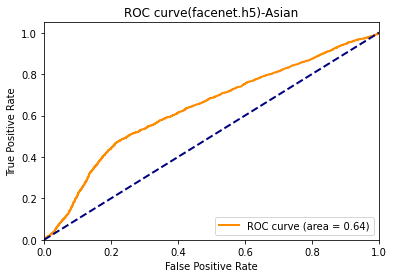

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve(facenet.h5)-Asian')
plt.legend(loc="lower right")
plt.show()

# threshold
- not using k-fold

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.tree import export_graphviz

In [ ]:
clf1 = DecisionTreeClassifier(max_depth=1)
X = np.array(df1['distance_l2']).reshape(-1, 1)
y = np.array(df1['y']).reshape(-1, 1)
clf1.fit(X, y)
print(clf1.score(X, y))

0.6271666666666667


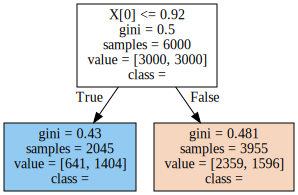

In [ ]:
export_graphviz(clf1, out_file='clf1.dot', class_names=['불일치', '일치'], impurity=True, filled=True)
with open('clf1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
threshold = clf1.tree_.threshold[0]
print("threshold: {}".format(threshold))

In [ ]:
df1["pred_euclidean_l2"] = "No"

idx = df1[df1.distance_l2 <= threshold].index
df1.loc[idx, 'pred_euclidean_l2'] = 'Yes'

In [ ]:
cm = confusion_matrix(df1.decision.values, df1.pred_euclidean_l2.values)
cm

array([[2359,  641],
       [1596, 1404]])

In [ ]:
tn, fp, fn, tp = cm.ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  68.65525672371639 %
Recall:  46.800000000000004 %
F1 score  55.65906838453915 %
Accuracy:  62.71666666666667 %


---

# 2. lfw 데이터

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/기업프로젝트-라젠/deepface/tests/pair_with_dist_lfw.csv')
df2

,file_x,file_y,decision,distance_l2
0,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,0.6724
1,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,0.6943
2,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,0.8109
3,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,1.5055
4,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,Yes,1.2800
...,...,...,...,...
5995,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.3550
5996,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.4504
5997,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.5216
5998,/content/drive/My Drive/main_proj/라젠/deepfa...,/content/drive/My Drive/main_proj/라젠/deepfa...,No,1.1188


In [ ]:
a = '/content/drive/My Drive/main_proj/라젠/deepface/tests/lfw_funneled_samples/'
b = '/content/drive/My Drive/기업프로젝트-라젠/deepface/tests/lfw_funneled_samples/'

df2['file_x'] = df2['file_x'].apply(lambda x: x.replace(a, b))
df2['file_y'] = df2['file_y'].apply(lambda x: x.replace(a, b))

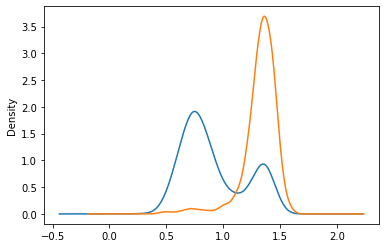

In [ ]:
df2[df2.decision == "Yes"].distance_l2.plot.kde()
df2[df2.decision == "No"].distance_l2.plot.kde()

# ROC curve

In [ ]:
df2['distance_l2_scaled'] = -df2['distance_l2']

In [ ]:
encoder = LabelEncoder()
encoder.fit(df2['decision'])
df2['y'] = encoder.transform(df2['decision']) # 1='Yes' / 0='No'
df2['y']

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: y, Length: 6000, dtype: int64

In [ ]:
fpr, tpr, thresholds = roc_curve(df2['y'], df2['distance_l2_scaled'], pos_label=1)
roc_auc = auc(fpr, tpr)

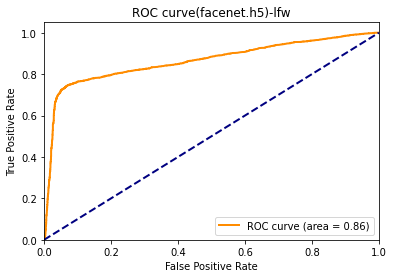

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve(facenet.h5)-lfw')
plt.legend(loc="lower right")
plt.show()

# Threshold

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=1)
X = np.array(df2['distance_l2']).reshape(-1, 1)
y = np.array(df2['y']).reshape(-1, 1)
clf2.fit(X, y)
print(clf2.score(X, y))

0.8366666666666667


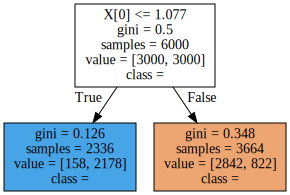

In [ ]:
export_graphviz(clf2, out_file='clf2.dot', class_names=['불일치', '일치'], impurity=True, filled=True)
with open('clf2.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
threshold = clf2.tree_.threshold[0]

In [ ]:
df2["pred_euclidean_l2"] = "No"

idx = df2[df2.distance_l2 <= threshold].index
df2.loc[idx, 'pred_euclidean_l2'] = 'Yes'

In [ ]:
df2.sample(5)

,file_x,file_y,decision,distance_l2,distance_l2_scaled,y,pred_euclidean_l2
3979,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,1.4705,-1.4705,0,No
2445,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,Yes,0.4666,-0.4666,1,Yes
3681,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,1.2782,-1.2782,0,No
4165,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,1.4183,-1.4183,0,No
5675,/content/drive/My Drive/기업프로젝트-라젠/d...,/content/drive/My Drive/기업프로젝트-라젠/d...,No,1.2928,-1.2928,0,No


In [ ]:
cm = confusion_matrix(df2.decision.values, df2.pred_euclidean_l2.values)
cm

array([[2842,  158],
       [ 822, 2178]])

In [ ]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp 

(2842, 158, 822, 2178)

In [ ]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  93.23630136986301 %
Recall:  72.6 %
F1 score  81.63418290854571 %
Accuracy:  83.66666666666667 %
